<a href="https://colab.research.google.com/github/w8mr/ing-ml-challenge/blob/master/ING_ML_Challenge_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ING Machine learning challenge week 6 Income data

## Setup kaggle, token and datasets

Upgrade Kaggle

In [0]:
!pip install kaggle --upgrade
!kaggle --version

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Upload kaggle token


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 73 bytes


Download and unzip the dataset

In [0]:
!kaggle competitions download -c ml-challenge-week6
!unzip -o census-income.data.zip
!unzip -o census-income.test.zip

  0% 0.00/3.24M [00:00<?, ?B/s]
100% 3.24M/3.24M [00:00<00:00, 107MB/s]
  0% 0.00/769k [00:00<?, ?B/s]
100% 769k/769k [00:00<00:00, 107MB/s]
 70% 5.00M/7.14M [00:00<00:00, 49.0MB/s]
100% 7.14M/7.14M [00:00<00:00, 45.6MB/s]
  0% 0.00/14.5k [00:00<?, ?B/s]
100% 14.5k/14.5k [00:00<00:00, 12.5MB/s]
Archive:  census-income.data.zip
  inflating: census-income.data      
Archive:  census-income.test.zip
  inflating: census-income.test      


In [0]:
import pandas as pd 
import numpy as np


# Column names found at https://www2.1010data.com/documentationcenter/beta/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html manually adjusted
header_list = ["age", "class of worker", "industry code", "occupation code", 
               #"adjusted gross income", 
               "education", "wage per hour", 
               "enrolled in edu inst last wk", "marital status", "major industry code", 
               "major occupation code", "mace", "hispanic Origin", "sex", 
               "member of a labor union", "reason for unemployment", 
               "full or part time employment stat", "capital gains", "capital losses", 
               "divdends from stocks", 
               #"federal income tax liability", 
               "tax filer status", 
               "region of previous residence", "state of previous residence", 
               "detailed household and family stat", "detailed household summary in household", 
               "instance weight", "migration code-change in msa", "migration code-change in reg", 
               "migration code-move within reg", "live in this house 1 year ago", 
               "migration prev res in sunbelt", "num persons worked for employer", 
               "family members under 18", 
               #"total person earnings", 
               "country of birth father",
               "country of birth mother", "country of birth self", "citizenship", 
               "total person income", "own business or self employed", "veterans benefits", "weeks worked in the year", "year of survey", "taxable income amount"]

train_df = pd.read_csv('census-income.data', header=None, names=header_list, na_values=[" Not in universe", " Not in universe or children", " Not in universe under 1 year old", " ?"])
train_df.info()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                                        199523 non-null int64
class of worker                            99278 non-null object
industry code                              199523 non-null int64
occupation code                            199523 non-null int64
education                                  199523 non-null object
wage per hour                              199523 non-null int64
enrolled in edu inst last wk               12580 non-null object
marital status                             199523 non-null object
major industry code                        98839 non-null object
major occupation code                      98839 non-null object
mace                                       199523 non-null object
hispanic Origin                            199523 non-null object
sex                                        199523 non-null object
member of a labor union                

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,mace,hispanic Origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,divdends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,total person income,own business or self employed,veterans benefits,weeks worked in the year,year of survey,taxable income amount
0,73,NaN,0,0,High school graduate,0,NaN,Widowed,NaN,NaN,White,All other,Female,NaN,NaN,Not in labor force,0,0,0,Nonfiler,NaN,NaN,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,NaN,NaN,0,NaN,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,NaN,Divorced,Construction,Precision production craft & repair,White,All other,Male,NaN,NaN,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,NaN,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,- 50000.
2,18,NaN,0,0,10th grade,0,High school,Never married,NaN,NaN,Asian or Pacific Islander,All other,Female,NaN,NaN,Not in labor force,0,0,0,Nonfiler,NaN,NaN,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,NaN,NaN,0,NaN,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,NaN,2,0,95,- 50000.
3,9,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,White,All other,Female,NaN,NaN,Children or Armed Forces,0,0,0,Nonfiler,NaN,NaN,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.
4,10,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,White,All other,Female,NaN,NaN,Children or Armed Forces,0,0,0,Nonfiler,NaN,NaN,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.


## Inspect data


In [0]:
train_df = train_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [0]:
smallest_group = 20
industry_occupation_count = train_df.groupby(by=['industry code','occupation code'])['age'].apply(lambda x: (x.name[0]*100+x.name[1], x.name[0]*100+x.name[1] if x.count() > smallest_group else x.name[0]*100))
industry_occupation_dict = {tup[0]: tup[1] for tup in industry_occupation_count.values} 

train_df['industry_occupation'] = (train_df['industry code']*100+train_df['occupation code']).apply(lambda x: industry_occupation_dict[x])

In [0]:
for column in train_df.columns:
    print("Column {}: \nValues{}\n".format(column, train_df[column].unique()))


Column age: 
Values[73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]

Column class of worker: 
Values[nan 'Self-employed-not incorporated' 'Private' 'Local government'
 'Federal government' 'Self-employed-incorporated' 'State government'
 'Never worked' 'Without pay']

Column industry code: 
Values[ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]

Column occupation code: 
Values[ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]

Column education: 
Values['High school graduate' 'Some college but no degree' '10th grade'
 'Children' 'Bachelors degree(BA AB BS)'
 'Ma

Strip whitespace

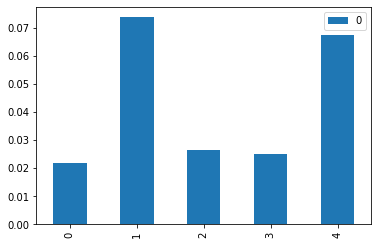

{'Amer Indian Aleut or Eskimo': 0.021768103065304308,
 'Asian or Pacific Islander': 0.07369323050556983,
 'Black': 0.02645113886847906,
 'Other': 0.024883784522832922,
 'White': 0.06734980431989962}

In [0]:
def part_above_50k(column):
  return {tup[0]: tup[1][tup[1]=='50000+.'].count()/tup[1].count() for tup in train_df.groupby(by=[column])['taxable income amount']}
io_above50k = part_above_50k('mace')

import matplotlib.pyplot as plt

pd.DataFrame(io_above50k.values()).plot.bar()
plt.show()

#train_df['industry_occupation_'] = train_df['industry_occupation'].apply(io_above50k.get)
#train_df

io_above50k    

In [0]:
train_df.groupby(by=['mace','taxable income amount']).count()

age  ...  industry_occupation
mace                        taxable income amount          ...                     
Amer Indian Aleut or Eskimo - 50000.                 2202  ...                 2202
                            50000+.                    49  ...                   49
Asian or Pacific Islander   - 50000.                 5405  ...                 5405
                            50000+.                   430  ...                  430
Black                       - 50000.                19875  ...                19875
                            50000+.                   540  ...                  540
Other                       - 50000.                 3566  ...                 3566
                            50000+.                    91  ...                   91
White                       - 50000.               156093  ...               156093
                            50000+.                 11272  ...                11272

[10 rows x 41 columns]

In [0]:
12382/187141

0.06616401536809144

In [0]:
train_df['class of worker'].unique()

array([nan, ' Self-employed-not incorporated', ' Private',
       ' Local government', ' Federal government',
       ' Self-employed-incorporated', ' State government',
       ' Never worked', ' Without pay'], dtype=object)

In [0]:
test_df = pd.read_csv('census-income.test', header=None, names=header_list[:-1])
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 41 columns):
age                                        99762 non-null int64
class of worker                            99762 non-null object
industry code                              99762 non-null int64
occupation code                            99762 non-null int64
education                                  99762 non-null object
wage per hour                              99762 non-null int64
enrolled in edu inst last wk               99762 non-null object
marital status                             99762 non-null object
major industry code                        99762 non-null object
major occupation code                      99762 non-null object
mace                                       99762 non-null object
hispanic Origin                            99357 non-null object
sex                                        99762 non-null object
member of a labor union                    99762 n

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,mace,hispanic Origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,divdends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,total person income,own business or self employed,veterans benefits,weeks worked in the year,year of survey
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95


## Making a submission

In [0]:
import numpy as np

submission_df = pd.read_csv('sampleSubmission.csv')
submission_df['income class'] = np.random.randint(0, 2, submission_df.shape[0])
submission_df['income class'].head()

In [0]:
submission_df.to_csv('submission.csv')

```
usage: kaggle competitions submit [-h] -f FILE_NAME -m MESSAGE [-q]
                                  [competition]

required arguments:
  -f FILE_NAME, --file FILE_NAME
                        File for upload (full path)
  -m MESSAGE, --message MESSAGE
                        Message describing this submission

optional arguments:
  -h, --help            show this help message and exit
  competition           Competition URL suffix (use "kaggle competitions list" to show options)
                        If empty, the default competition will be used (use "kaggle config set competition")"
  -q, --quiet           Suppress printing information about the upload/download progress
```

In [0]:
!kaggle competitions submit -c ml-challenge-week6 -f submission.csv -m "Test"

## List competition submissions

```
usage: kaggle competitions submissions [-h] [-v] [-q] [competition]

optional arguments:
  -h, --help   show this help message and exit
  competition  Competition URL suffix (use "kaggle competitions list" to show options)
               If empty, the default competition will be used (use "kaggle config set competition")"
  -v, --csv    Print results in CSV format (if not set print in table format)
  -q, --quiet  Suppress printing information about the upload/download progress
```

In [0]:
!kaggle competitions submissions ml-challenge-week6

## Get competition leaderboard

```
usage: kaggle competitions leaderboard [-h] [-s] [-d] [-p PATH] [-v] [-q]
                                       [competition]

optional arguments:
  -h, --help            show this help message and exit
  competition           Competition URL suffix (use "kaggle competitions list" to show options)
                        If empty, the default competition will be used (use "kaggle config set competition")"
  -s, --show            Show the top of the leaderboard
  -d, --download        Download entire leaderboard
  -p PATH, --path PATH  Folder where file(s) will be downloaded, defaults to current working directory
  -v, --csv             Print results in CSV format (if not set print in table format)
  -q, --quiet           Suppress printing information about the upload/download progress
```

In [0]:
!kaggle competitions leaderboard ml-challenge-week6 -s

 teamId  teamName                    submissionDate       score    
-------  --------------------------  -------------------  -------  
4467419  God mode (or cheating)      2020-02-28 14:32:13  1.00000  
4467274  ML Challenge Solution       2020-02-28 12:56:08  0.85963  
4448485  ML Challenge Benchmark      2020-02-25 07:14:07  0.72384  
4467459  Random guessing (be above)  2020-02-28 14:39:17  0.50006  


## Uploading a Colab notebook to Kaggle Kernels

### Downloading a notebook from Colab

To download from Colab, use **File** | **Download .ipynb**

### Then upload the notebook to your Colab runtime

In [0]:
uploaded = files.upload()
notebook_path = list(uploaded.keys())[0]

In [0]:
!mkdir -p export
!mv "$notebook_path" export/

### Initialize metadata file for a kernel

```
usage: kaggle kernels init [-h] [-p FOLDER]

optional arguments:
  -h, --help            show this help message and exit
  -p FOLDER, --path FOLDER
                        Folder for upload, containing data files and a special kernel-metadata.json file       
                        (https://github.com/Kaggle/kaggle-api/wiki/Kernel-Metadata). 
                        Defaults to current working directory
```

In [0]:
!kaggle kernels init -p export

In [0]:
import re
your_kaggle_username = 'Your kaggle username'
notebook_title = 'New Kernel'
new_kernel_slug = re.sub(r'[^a-z0-9]+', '-', notebook_title.lower())
notebook_path = 'export'
metadata_file = 'export/kernel-metadata.json'

In [0]:
import json

with open(metadata_file) as json_file:
    metadata = json.load(json_file)

metadata['code_file'] = notebook_path
metadata['kernel_type'] = 'notebook'
metadata['language'] = 'python'
metadata['id'] = f'{your_kaggle_username}/{new_kernel_slug}'
metadata['title'] = notebook_title

with open(metadata_file, 'w') as outfile:
    json.dump(metadata, outfile, indent=4)

In [0]:
!cat export/kernel-metadata.json

```
usage: kaggle kernels push [-h] -p FOLDER

optional arguments:
  -h, --help            show this help message and exit
  -p FOLDER, --path FOLDER
                        Folder for upload, containing data files and a special kernel-metadata.json file 
                        (https://github.com/Kaggle/kaggle-api/wiki/Kernel-Metadata). 
                        Defaults to current working directory
```

In [0]:
!kaggle kernels push -p export